In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sfo-cargo-activity/SFO_Cargo_Activity_AA_DA_UA.csv


In [2]:
sfo_cargo_activity_df = pd.read_csv("/kaggle/input/sfo-cargo-activity/SFO_Cargo_Activity_AA_DA_UA.csv")
sfo_cargo_activity_df.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
0,200507,American Airlines,AA,Domestic,US,Cargo,Passenger,1745713
1,200507,American Airlines,AA,Domestic,US,Mail,Passenger,394829
2,200507,American Airlines,AA,Domestic,US,Cargo,Passenger,2610403
3,200507,American Airlines,AA,Domestic,US,Mail,Passenger,867692
4,200507,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,722328
5,200507,Delta Air Lines,DL,Domestic,US,Express,Passenger,531960
6,200507,Delta Air Lines,DL,Domestic,US,Mail,Passenger,160118
7,200507,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,64769
8,200507,Delta Air Lines,DL,Domestic,US,Express,Passenger,1481410
9,200507,Delta Air Lines,DL,Domestic,US,Mail,Passenger,213104


In [3]:
airlines = sfo_cargo_activity_df.loc[:,'Operating Airline']
airlines.drop_duplicates(keep='first',inplace=True)
airlines = list(airlines)
print(airlines)

['American Airlines', 'Delta Air Lines', 'United Airlines']


In [4]:
american_airlines_df = sfo_cargo_activity_df.loc[sfo_cargo_activity_df['Operating Airline'] == 'American Airlines',:]
american_airlines_df.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
0,200507,American Airlines,AA,Domestic,US,Cargo,Passenger,1745713
1,200507,American Airlines,AA,Domestic,US,Mail,Passenger,394829
2,200507,American Airlines,AA,Domestic,US,Cargo,Passenger,2610403
3,200507,American Airlines,AA,Domestic,US,Mail,Passenger,867692
14,200508,American Airlines,AA,Domestic,US,Cargo,Passenger,2055952
15,200508,American Airlines,AA,Domestic,US,Mail,Passenger,361009
16,200508,American Airlines,AA,Domestic,US,Cargo,Passenger,2694082
17,200508,American Airlines,AA,Domestic,US,Mail,Passenger,903002
28,200509,American Airlines,AA,Domestic,US,Cargo,Passenger,2534009
29,200509,American Airlines,AA,Domestic,US,Mail,Passenger,319027


In [5]:
da_df = sfo_cargo_activity_df.loc[sfo_cargo_activity_df['Operating Airline'] == 'Delta Air Lines',:]
da_df.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
4,200507,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,722328
5,200507,Delta Air Lines,DL,Domestic,US,Express,Passenger,531960
6,200507,Delta Air Lines,DL,Domestic,US,Mail,Passenger,160118
7,200507,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,64769
8,200507,Delta Air Lines,DL,Domestic,US,Express,Passenger,1481410
9,200507,Delta Air Lines,DL,Domestic,US,Mail,Passenger,213104
18,200508,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,808305
19,200508,Delta Air Lines,DL,Domestic,US,Express,Passenger,531371
20,200508,Delta Air Lines,DL,Domestic,US,Mail,Passenger,142789
21,200508,Delta Air Lines,DL,Domestic,US,Cargo,Passenger,72393


In [6]:
united_airlines_df = sfo_cargo_activity_df.loc[sfo_cargo_activity_df['Operating Airline'] == 'United Airlines',:]
united_airlines_df.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
10,200507,United Airlines,UA,Domestic,US,Cargo,Passenger,210339
11,200507,United Airlines,UA,Domestic,US,Mail,Passenger,176740
12,200507,United Airlines,UA,Domestic,US,Cargo,Passenger,290324
13,200507,United Airlines,UA,Domestic,US,Mail,Passenger,569459
24,200508,United Airlines,UA,Domestic,US,Cargo,Passenger,189511
25,200508,United Airlines,UA,Domestic,US,Mail,Passenger,177084
26,200508,United Airlines,UA,Domestic,US,Cargo,Passenger,308986
27,200508,United Airlines,UA,Domestic,US,Mail,Passenger,578003
38,200509,United Airlines,UA,Domestic,US,Cargo,Passenger,213548
39,200509,United Airlines,UA,Domestic,US,Mail,Passenger,163635


In [7]:
summary = {'Stats':['Count','Mean','Standard Deviation','Min','25th Quartile','Median','75th Quartile','Max']}


In [8]:
aa = list(american_airlines_df[['Cargo Weight LBS']].describe().iloc[:,0])
aa = [ '%.2f' % i for i in aa ]
summary['American Airlines'] = aa

In [9]:
da = list(da_df[['Cargo Weight LBS']].describe().iloc[:,0])
da = [ '%.2f' % i for i in da ]
summary['Delta Air Lines'] = da

In [10]:
ua = list(united_airlines_df[['Cargo Weight LBS']].describe().iloc[:,0])
ua = [ '%.2f' % i for i in ua ]
summary['United Airlines'] = ua

In [11]:
summary_stats_df = pd.DataFrame(summary)
summary_stats_df.round(3)
print(summary_stats_df)

                Stats American Airlines Delta Air Lines United Airlines
0               Count            767.00          980.00         3539.00
1                Mean         737782.18       494950.51       766725.95
2  Standard Deviation         653534.67       362554.06      1517685.36
3                 Min              5.00            1.00            1.00
4       25th Quartile         241964.00       187204.50         4445.00
5              Median         470553.00       476634.00       106727.00
6       75th Quartile        1149492.50       736607.25       710544.50
7                 Max        3519263.00      1747119.00     10785758.00


In [12]:
summary_stats_df.set_index('Stats',inplace=True)

In [13]:
no_of_shipments = []
for i in summary_stats_df.loc['Count',:]:
    no_of_shipments.append(float(i))

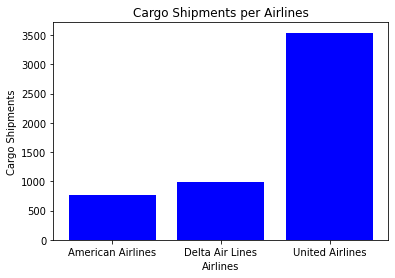

In [14]:
fig = plt.figure()
fig.add_subplot(111)
plt.bar(airlines,no_of_shipments,color='blue')
plt.ylabel('Cargo Shipments')
plt.xlabel('Airlines')
plt.title('Cargo Shipments per Airlines')
plt.show(fig)
plt.show(fig)

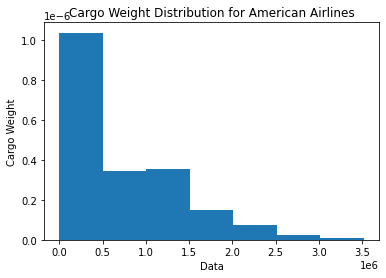

In [15]:
fig = plt.figure()
fig.add_subplot(111)
plt.hist(american_airlines_df.loc[:,'Cargo Weight LBS'],density=True,bins=7)
plt.ylabel('Cargo Weight')
plt.xlabel('Data')
plt.title('Cargo Weight Distribution for American Airlines')
plt.show(fig)

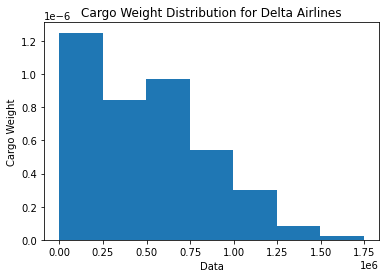

In [16]:
fig = plt.figure()
fig.add_subplot(111)
plt.hist(da_df.loc[:,'Cargo Weight LBS'],density=True,bins=7)
plt.ylabel('Cargo Weight')
plt.xlabel('Data')
plt.title('Cargo Weight Distribution for Delta Airlines')
plt.show(fig)

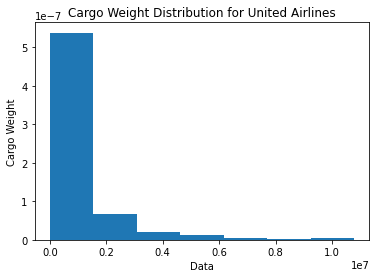

In [17]:
fig = plt.figure()
fig.add_subplot(111)
plt.hist(united_airlines_df.loc[:,'Cargo Weight LBS'],density=True,bins=7)
plt.ylabel('Cargo Weight')
plt.xlabel('Data')
plt.title('Cargo Weight Distribution for United Airlines')
plt.show(fig)